In [1]:
#THIS IS ALL ABOUT SLICING, GROUPING AND APPLYING OPERATIONS TO EACH OF THOSE
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

In [2]:
#GROUP BY FUNCTION

# STEPS:
#     1. PREPARE A GROUP BY OBJECT
#     2. APPLY DESIRED AGGREGATION/OPERATION ON THE SAME
    
# SAMPLE DATAFRAME:

DF = DataFrame({'Column1':['x','v','v','v','x'],'Column2':['a','a','b','b','c'],'Data1':np.random.randn(5),'Data2':np.random.randn(5)})    
DF

,Column1,Column2,Data1,Data2
0,x,a,0.531284,-0.297327
1,v,a,1.766799,0.601772
2,v,b,-0.812847,0.901058
3,v,b,0.949325,-0.748197
4,x,c,-0.313803,0.149489


In [3]:
#Calculating Mean of values in Data1 column by Column1 variables
groupby_obj = DF['Data1'].groupby(DF['Column1'])
groupby_obj.mean()

Column1
v    0.634426
x    0.108740
Name: Data1, dtype: float64

In [4]:
#Calculating Mean of values in Data1 column by Column1 as well as column2 variables
groupby_obj = DF['Data1'].groupby([DF['Column1'],DF['Column2']])
groupby_obj.mean().unstack()                    #unstacking the series/array output to get rows to columns and form a data frame

Column2,a,b,c
Column1,,,
v,1.766799,0.068239,NaN
x,0.531284,NaN,-0.313803


In [5]:
#Shorter way of writing above statements
DF.groupby([DF['Column1'],DF['Column2']]).mean()  #This will automatically perform operation on both numeric data columns

Data1     Data2
Column1 Column2                    
v       a        1.766799  0.601772
        b        0.068239  0.076431
x       a        0.531284 -0.297327
        c       -0.313803  0.149489

In [6]:
#Getting the size/count of observation under each categories
DF.groupby([DF['Column1'],DF['Column2']]).size().unstack()

Column2,a,b,c
Column1,,,
v,1.0,2.0,NaN
x,1.0,NaN,1.0


In [7]:
#ITERATING OVER GROUPS:
for key,value in DF['Data1'].groupby(DF['Column1']):
    print('COLUMN VARIABLES','\n',key,type(key),'\n')
    print('DATA VALUES','\n',value,type(value),'\n')
    
#what is it returning? It is returning groups of combination of variables of both the columns    

COLUMN VARIABLES 
 v <class 'str'> 

DATA VALUES 
 1    1.766799
2   -0.812847
3    0.949325
Name: Data1, dtype: float64 <class 'pandas.core.series.Series'> 

COLUMN VARIABLES 
 x <class 'str'> 

DATA VALUES 
 0    0.531284
4   -0.313803
Name: Data1, dtype: float64 <class 'pandas.core.series.Series'> 



In [8]:
# By default groupby groups on axis=0, but you can group on any of the other axes.

dict(list(DF.groupby(DF.dtypes,axis=1)))

#Group by objects can be transformed to list further to dictionaries to get visual and usable data of groups
#By default group by occurs at a row level that is on axis = 0

{dtype('float64'):       Data1     Data2
 0  0.531284 -0.297327
 1  1.766799  0.601772
 2 -0.812847  0.901058
 3  0.949325 -0.748197
 4 -0.313803  0.149489,
 dtype('O'):   Column1 Column2
 0       x       a
 1       v       a
 2       v       b
 3       v       b
 4       x       c}

In [9]:
# Selecting a Column or Subset of Columns

print(DF.groupby(['Column1'])['Data1'].mean())
print(DF['Data1'].groupby(DF['Column1']).mean())


#directly getting column1's distinct values with their corresponding means from Data2
#Columns can be specified either in the front or in the back after the aggregation operations
#This is nothing but syntax variation to get outputs with less amount coding.

Column1
v    0.634426
x    0.108740
Name: Data1, dtype: float64
Column1
v    0.634426
x    0.108740
Name: Data1, dtype: float64


In [10]:
# Grouping with dicts and lists

people = DataFrame(np.random.randn(5,5),columns = ['a','b','c','d','e'],index = ['joe','sweet','bitter','sour','mad'])
mapping = {'a':'red','b':'blue','c':'green','d':'yellow','e':'green','f':'violet'}

# We want the grouping to happen not on a-e variables but on colors
#Also the grouping is by columns hence axis = 1
people.groupby(mapping,axis=1).sum()

# Primary Use Case: When we have a variable in one data frame and values for representation in another data structure; that is when 
#     we can use above tachnique

,blue,green,red,yellow
joe,-0.850545,0.953200,-0.837834,-0.340252
sweet,-0.669212,-1.430678,0.142512,-1.676341
bitter,-0.610170,-0.962178,0.610407,0.251300
sour,0.515701,0.628502,-0.664904,1.518648
mad,-1.456137,-0.270835,0.440216,-0.424162


In [11]:
# Grouping with Functions

# Any function passed as a
# group key will be called once per index value, with the return values being used as the
# group names. More concretely, consider the example DataFrame from the previous
# section, which has people’s first names as index values. Suppose you wanted to group
# by the length of the names; you could compute an array of string lengths, but instead
# you can just pass the len function:

# Also we need not worry if waht we intend will happen againsts names or not becasue names here are indexes so by default
# group by will occur on names of axis = 0 

people.groupby(len).sum()

,a,b,c,d,e
3,-0.397617,-2.306682,-1.550104,-0.764414,2.232469
4,-0.664904,0.515701,0.577381,1.518648,0.051121
5,0.142512,-0.669212,-2.046776,-1.676341,0.616097
6,0.610407,-0.610170,-1.345838,0.251300,0.383660


In [12]:
# Group by Hierarchical index levels

people = DataFrame(np.random.randn(5,5),
                   columns = [['aplha','aplha','alpha','bet','bet'],['a','b','c','d','e']],
                   index = ['joe','sweet','bitter','sour','mad'])

people.groupby(level=0,axis=1).count(),people.groupby(level=1,axis=1).count()

(        alpha  aplha  bet
 joe         1      2    2
 sweet       1      2    2
 bitter      1      2    2
 sour        1      2    2
 mad         1      2    2,
         a  b  c  d  e
 joe     1  1  1  1  1
 sweet   1  1  1  1  1
 bitter  1  1  1  1  1
 sour    1  1  1  1  1
 mad     1  1  1  1  1)

In [13]:
# Data aggregation
#aggregate data by columns; give each aggregation their special name

tips = pd.read_excel(r'D:\Study Materials\Documents to play with in python\tips.xlsx', index_col=0)
# tip_percentage
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


In [14]:
#Get mean of the tips percentage by sex and smoker status

tips['tip_pct'].groupby([tips['sex'],tips['smoker']]).mean()

sex     smoker
Female  No        0.103127
Male    No        0.163287
Name: tip_pct, dtype: float64

In [15]:
#Apply a list of functions to tips_pct 
tips['tip_pct'].groupby([tips['sex'],tips['smoker']]).agg(['mean','std','sum'])

,,mean,std,sum
sex,smoker,,,
Female,No,0.103127,0.061773,0.206254
Male,No,0.163287,0.019129,0.653149


In [16]:
#In the above function pass tuples of (function_name,funtion) as list to get desired names
tips['tip_pct'].groupby([tips['sex'],tips['smoker']]).agg([('matlabi','mean'),('sidho','std'),('vatta','sum')])

,,matlabi,sidho,vatta
sex,smoker,,,
Female,No,0.103127,0.061773,0.206254
Male,No,0.163287,0.019129,0.653149


In [17]:
#In the above statement also pass the specific columns to which certain functions should be passed. This will be in the
# form of a disctionary

tips.groupby([tips['sex'],tips['smoker']]).agg({'tip':'mean','size':'std','total_bill':'sum'})

,,tip,size,total_bill
sex,smoker,,,
Female,No,2.310,1.414214,41.58
Male,No,3.295,0.816497,80.32


In [18]:
#A little thoery

# Remember one thing; that all the aggregation function are RUN ON AN ARRAY/SERIES AND RETURN A SCALAR (SINGULAR VALUE).
# Hence agg on a group will return scalar values

# A little Example:
# In the data frame do the following:
#     1. Calculate mean of the columns by groups
#     2. Replace all the values by above means

print('Example Data Frame\n\n',DF,'\n')

means = DF.groupby(DF['Column1']).mean()
print('Mean of values of column1 for Data1 and data2\n\n',means,'\n')

print(pd.merge(DF,means,left_on = 'Column1',right_index = True),'\n')
#As we can see the new output has 2 extra column with means havong replaced original values as per the groupings

print('Same can be done by a little effort using TRANSFORM\n\n')
DF.groupby('Column1').transform(np.mean)

#THE ABOVE PROCESS OF EXTENDING MEAN OF A COLUMN TO ITS CELL VALUES IS CALLED BROADCASTING

Example Data Frame

   Column1 Column2     Data1     Data2
0       x       a  0.531284 -0.297327
1       v       a  1.766799  0.601772
2       v       b -0.812847  0.901058
3       v       b  0.949325 -0.748197
4       x       c -0.313803  0.149489 

Mean of values of column1 for Data1 and data2

             Data1     Data2
Column1                    
v        0.634426  0.251544
x        0.108740 -0.073919 

  Column1 Column2   Data1_x   Data2_x   Data1_y   Data2_y
0       x       a  0.531284 -0.297327  0.108740 -0.073919
4       x       c -0.313803  0.149489  0.108740 -0.073919
1       v       a  1.766799  0.601772  0.634426  0.251544
2       v       b -0.812847  0.901058  0.634426  0.251544
3       v       b  0.949325 -0.748197  0.634426  0.251544 

Same can be done by a little effort using TRANSFORM




,Data1,Data2
0,0.108740,-0.073919
1,0.634426,0.251544
2,0.634426,0.251544
3,0.634426,0.251544
4,0.108740,-0.073919


In [19]:
#Let us understand the same theory a little bit in more detail

#define a function that in a column replaces the values by difference of value and columns mean

def on_series_subs(arrayy):
    return arrayy - arrayy.mean()

print(DF.groupby('Column1').transform(on_series_subs),'\n') #This outputs overall mean will be 0 as expected

new_DF = (DF.groupby('Column1').transform(on_series_subs))
new_DF['Data1'].mean(),new_DF['Data2'].mean()

      Data1     Data2
0  0.422544 -0.223408
1  1.132373  0.350228
2 -1.447273  0.649513
3  0.314899 -0.999741
4 -0.422544  0.223408 



(0.0, 2.2204460492503132e-17)

In [20]:
#Do not want to group? Then suppress the grouping
tips['tip_pct'].groupby([tips['sex'],tips['smoker']],group_keys = False).apply(np.mean).unstack()

# What does apply do?
# apply splits the
# object being manipulated into pieces, invokes the passed function on each piece, then
# attempts to concatenate the pieces together.

smoker,No
sex,
Female,0.103127
Male,0.163287


In [21]:
#Prepare a pivot table that has row subtotals as well as column subtotals
#margin = True allows us to get subtotals
DF.pivot_table(['Data1','Data2'], index='Column1', columns = 'Column2',margins = True,fill_value = 'HEHA')

#Alternative to pivot_table function would be crosstab

Data1                                    Data2             \
Column2         a          b         c       All         a          b   
Column1                                                                 
v          1.7668  0.0682394      HEHA  0.634426  0.601772  0.0764305   
x        0.531284       HEHA -0.313803   0.10874 -0.297327       HEHA   
All       1.14904  0.0682394 -0.313803  0.424152  0.152223  0.0764305   

                             
Column2         c       All  
Column1                      
v            HEHA  0.251544  
x        0.149489 -0.073919  
All      0.149489  0.121359

In [22]:
#LETS US DO SOME LITTLE DATA DIGGING THROUGH INDEPENDENT EXPENDITURE DATA WE HAVE OF US PRESIDENTIAL CANDIDATES FOR 2011-12

expenditure_df = pd.read_csv(r'D:\Study Materials\Documents to play with in python\independent_expenditure_2012.csv')

C:\Users\Mehul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
#Lets us ee the data structure
expenditure_df.head()

,cand_id,cand_name,spe_id,spe_nam,ele_type,can_office_state,can_office_dis,can_office,cand_pty_aff,exp_amo,...,pur,pay,file_num,amndt_ind,tran_id,image_num,receipt_dat,fec_election_yr,prev_file_num,dissem_dt
0,NaN,"BUERKLE, ANNE MARIE",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,25.0,H,NaN,25394.45,...,CAMPAIGN MAIL,BLUE AND READ,828733,N,SE.11281,12940741700,26-OCT-12,2012,NaN,NaN
1,NaN,"BUERKLE, ANNE MARIE",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,25.0,H,NaN,21699.37,...,CAMPAIGN MAIL,BLUE AND READ,819700,N,SE.11222,12972712499,17-OCT-12,2012,NaN,NaN
2,NaN,"BUERKLE, ANNE MARIE",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,25.0,H,NaN,21699.37,...,CAMPAIGN MAIL,BLUE AND READ,819700,N,SE.11219,12972712498,17-OCT-12,2012,NaN,NaN
3,NaN,"BUERKLE, ANNE MARIE",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,25.0,H,NaN,21699.37,...,CAMPAIGN MAIL,BLUE AND READ,819700,N,SE.11216,12972712498,17-OCT-12,2012,NaN,NaN
4,NaN,"BUERKLE, ANNE MARIE",C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,G,NY,25.0,H,NaN,45438.97,...,CAMPAIGN MAIL,BLUE AND READ,821350,N,SE.11246,12940296091,19-OCT-12,2012,NaN,NaN


In [24]:
#Lets us look at the individual column names
expenditure_df.columns

Index(['cand_id', 'cand_name', 'spe_id', 'spe_nam', 'ele_type',
       'can_office_state', 'can_office_dis', 'can_office', 'cand_pty_aff',
       'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur', 'pay', 'file_num',
       'amndt_ind', 'tran_id', 'image_num', 'receipt_dat', 'fec_election_yr',
       'prev_file_num', 'dissem_dt'],
      dtype='object')

In [25]:
#lets us look at the unique candidates names
expenditure_df.cand_name.unique()

array(['BUERKLE, ANNE MARIE', 'HOCHUL, KATHY', 'OBAMA, BARACK', ...,
       'MESSER, LUCAS', 'VALADAO, DAVID', 'Condit, Chad'], dtype=object)

In [26]:
#Let us look at the top 10 average expenditure per candidate by election type G whatever it means
x = expenditure_df['agg_amo'].groupby([expenditure_df['cand_name'].map(str.lower),expenditure_df['ele_type']]).sum().unstack()
x.sort_values('G',ascending = False)[:10]

# We applied str.lower to combine names that were written in both LOWER as well as UPPER case.

ele_type,C,G,O,P,R,S
cand_name,,,,,,
"obama, barack",1.125851e+09,1.396939e+10,3671189.42,2.690273e+07,NaN,NaN
"romney, mitt",2.600000e+04,9.751607e+09,30226140.67,2.212810e+08,NaN,NaN
"brown, sherrod",NaN,1.242532e+09,NaN,8.201470e+03,NaN,NaN
"romney, willard",NaN,1.152710e+09,NaN,3.334805e+06,NaN,NaN
"mandel, josh",NaN,1.065822e+09,NaN,5.053517e+04,NaN,NaN
"barack, obama",NaN,4.925692e+08,NaN,3.102092e+07,NaN,NaN
"warren, elizabeth",NaN,3.941477e+08,NaN,1.700241e+06,NaN,NaN
"mitt, romney",NaN,3.904034e+08,NaN,9.005242e+06,NaN,NaN
"mack, connie",NaN,3.177771e+08,NaN,4.986252e+05,NaN,NaN


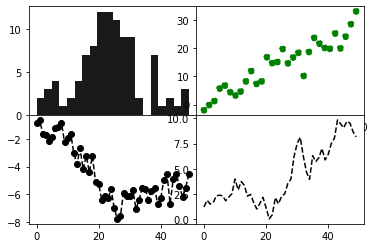

In [27]:
#WORKING WITH PLOTS AND CHARTS BASICS

# Plots in matplotlib reside within a Figure object

fig = plt.figure()

# Let us add 4 subplots in a figure palette
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#let us get a few data type
Random_array = randn(50).cumsum()
histogramic_series = np.random.randn(100)
scattering_data = np.arange(30)

#Let us set all the 4 different plots in the subplots we just created
ax3.plot(randn(50).cumsum(), 'k--',marker='o') #line styling specified here is dotted;  markers are specific data markers with
#opaque dark dot at every point
ax4.plot(randn(50).cumsum(), 'k--')
ax1.hist(histogramic_series, bins=20, color='k', alpha=0.9)  #alpha sets here the level of transparency of histogram diagram.
#o is least transparent and 1 is pitch dark
ax2.scatter(scattering_data, scattering_data + 3 * randn(30),linestyle='--', color='g') #applying green color and dashed line style

plt.subplots_adjust(wspace=0, hspace=0) #adjusting the subplot width space between each plots. Here we reduce it to 0
#Please note we are providing series data in all of the above plots

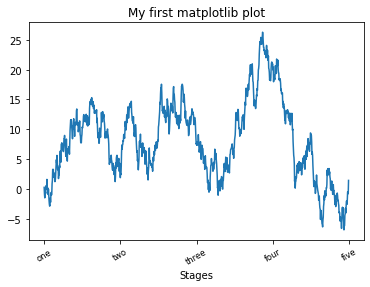

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())                       #series to be plotted
ticks = ax.set_xticks([0, 250, 500, 750, 1000])     #Setting the horizontal ticks at every 250 units interval
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small') #Setting tick labels
ax.set_title('My first matplotlib plot')            #giving title to entire plot
ax.set_xlabel('Stages')                             #giving title to X axis
plt.show()


#everytime plotting a new chart remember to add altogether a new instance of figure() as working on any previous instances
# will not render the chart and try and make changes to preivous works

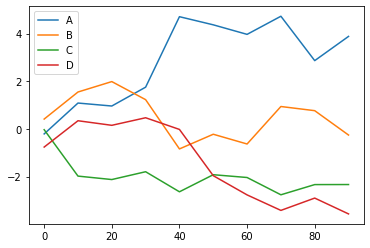

In [29]:
#plotting a dataframe
df = DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

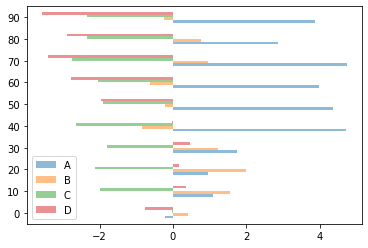

In [30]:
#Plotting a bar chart
df.plot(kind='barh', alpha=0.5)